## Prueba1: tiempo de ejecución vs cantidad de rivales ($n$)

In [11]:
import sys
sys.path.append('../')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from generacion_dataset import generar_dataset
from persistencia import importar_dataset, exportar_dataset, crear_directorio_salida
from mediciones import promediar_tiempos_ejecucion

In [4]:
MIN = 100
MAX = 10000
STEP = 100
RUTA_DATASET = f"../datasets/01_prueba_n_rivales"
RUTA_TIEMPOS = f"../mediciones/01_tiempos_ejecucion.csv"
RUTA_FIGURAS = f"../figuras/01_prueba_n_rivales"

In [12]:
crear_directorio_salida(RUTA_DATASET)

### Generación de datasets

In [5]:
for n in range(MIN, MAX, STEP):
    dataset = generar_dataset(n)
    ruta = f"{RUTA_DATASET}/{n}_elementos.csv"
    exportar_dataset(dataset, ruta)

### Medición de tiempos

In [6]:
iteraciones = 30
resultados = []
archivos = glob(f"./{RUTA_DATASET}/*.csv")

for archivo in archivos:
    n_elementos = archivo.split('/')[-1].split('_')[0]
    rivales = importar_dataset(archivo)
    tiempo_promedio = promediar_tiempos_ejecucion(rivales, iteraciones)
    resultados.append({"cantidad": int(n_elementos), "tiempo_ms": tiempo_promedio})

exportar_dataset(resultados, RUTA_TIEMPOS, ["cantidad", "tiempo_ms"])

### Gráficos

In [7]:
df = pd.read_csv(RUTA_TIEMPOS)

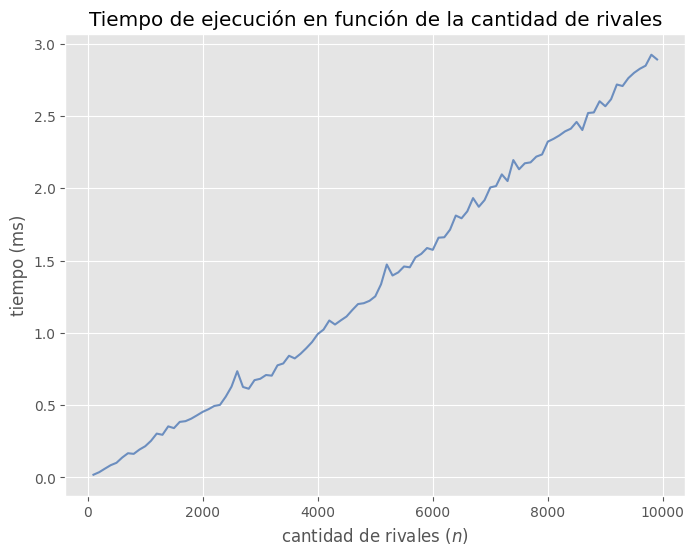

In [9]:
plt.style.use('ggplot')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.lineplot(data=df, x="cantidad", y="tiempo_ms", ax=ax, color="#6C8EBF")
ax.set_title("Tiempo de ejecución en función de la cantidad de rivales")
ax.set_xlabel("cantidad de rivales ($n$)")
ax.set_ylabel("tiempo (ms)")

fig.savefig(RUTA_FIGURAS, bbox_inches="tight")